In [1]:
# I first added as column names in the csv files "Frames,Ear1.X,Ear1.Y,Ear1.L,Ear2.X,Ear2.Y,Ear2.L,Ear3.X,
# Ear3.Y,Ear3.L,Ear4.X,Ear4.Y,Ear4.L,Ear5.X,Ear5.Y,Ear5.L,Eye1.X,Eye1.Y,Eye1.L,Eye2.X,Eye2.Y,Eye2.L,
#Eye3.X,Eye3.Y,Eye3.L,Eye4.X,Eye4.Y,Eye4.L,SnoutMid.X,SnoutMid.Y,SnoutMid.L,NoseTip.X,NoseTip.Y,NoseTip.L,
#Mouth.X,Mouth.Y,Mouth.L" instead of the columns the csv file had by default from DLC like scorer name etc.

# not filtered is better than filtered for facial expression network

#fps is 15.49 for this batch (no longer split into 3)

import pandas as pd
import numpy as np

df1=pd.read_csv("animal_442681_faceDLC_resnet50_Sample1Oct12shuffle3_800000.csv")
df2=pd.read_csv("animal_442682_faceDLC_resnet50_Sample1Oct12shuffle3_800000.csv")
df3=pd.read_csv("animal_442683_faceDLC_resnet50_Sample1Oct12shuffle3_800000.csv")
df4=pd.read_csv("animal_442684_faceDLC_resnet50_Sample1Oct12shuffle3_800000.csv")

df1.head()

,Frames,Ear1.X,Ear1.Y,Ear1.L,Ear2.X,Ear2.Y,Ear2.L,Ear3.X,Ear3.Y,Ear3.L,...,Eye4.L,SnoutMid.X,SnoutMid.Y,SnoutMid.L,NoseTip.X,NoseTip.Y,NoseTip.L,Mouth.X,Mouth.Y,Mouth.L
0,0,308.570465,287.076996,0.999999,266.234497,258.050934,0.999987,221.577454,280.447205,0.999955,...,0.999986,502.756531,264.330963,0.999871,544.731873,302.209442,0.999991,515.297424,337.984772,0.999913
1,1,310.298615,286.967377,0.999998,267.787994,258.779510,0.999991,222.615219,281.189209,0.999939,...,0.999987,503.595367,265.167816,0.999829,544.662109,303.227966,0.999981,515.457764,338.548828,0.999959
2,2,307.698151,288.166107,0.999999,264.343689,259.598419,0.999980,219.956512,282.562378,0.999949,...,0.999983,499.727509,264.323639,0.999859,542.959656,300.824829,0.999989,514.683289,337.300537,0.999942
3,3,306.360443,289.298615,0.999999,263.361786,261.083618,0.999979,218.351593,284.196564,0.999945,...,0.999982,498.847260,265.072144,0.999843,543.475037,299.734009,0.999989,515.491028,336.465363,0.999945
4,4,306.599579,289.453278,0.999999,263.452148,261.685669,0.999976,218.666290,284.958679,0.999935,...,0.999982,499.822693,264.963776,0.999878,543.720520,301.486176,0.999985,515.160950,336.830444,0.999955


In [19]:
# stim times for facial expression video, but we need to make them back to fps = 15.49/3

list_start1 = pd.read_csv("stim_times_442681.csv")
list_start1 = list_start1/3
list_start1 = list_start1.apply(np.floor)
list_start1 = list_start1.astype(int)
#list_start1.to_csv("list_start21.csv") # same as stim_times list, just staying consisent with the name
print(list_start1)

list_start2 = pd.read_csv("stim_times_442682.csv")
#list_start2.to_csv("list_start22.csv")
print(list_start2)

list_start3 = pd.read_csv("stim_times_442683.csv")
#list_start3.to_csv("list_start23.csv")
print(list_start3)

#missing laser trials for animal 4
list_start4 = pd.read_csv("stim_times_442684.csv")
#list_start4.to_csv("list_start24.csv")
print(list_start4)

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    15059    15347      14725   7031       6761     607         882
1    16412    15996      15657   7279       7466    1048        1271
2    17397    17091      16733   7973       7771    1499        1758
3    17612    18286      17973   8574       8263    1924        2121
4    18663    19204      18969   9065       8791    2400        2700
5    19770    20402      19536   9371       9578    3182        2985
6    21765    21227      20796  10158       9868    3487        3720
7    22086    22996      22468  10401      10577    3990        4238
8    23959    23262      23516  10841      11121    4409        4591
9    24758    24512      24260  11339      11613    4886        5108
   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    39066    38328      37460   2766       1896   21333       22048
1    40899    41728      40107   4180       3496   22654       23183
2    42736    44862      43854   5

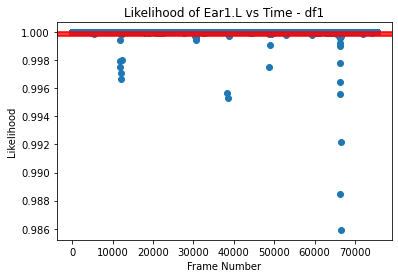

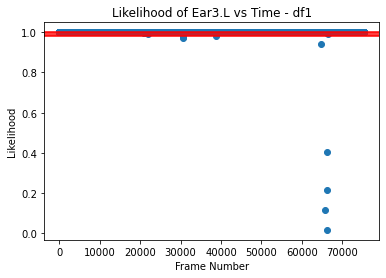

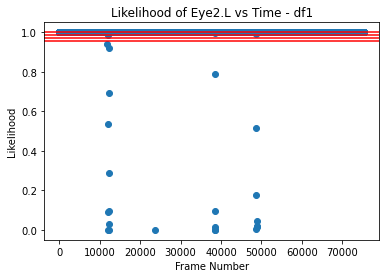

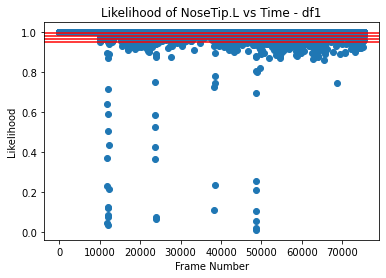

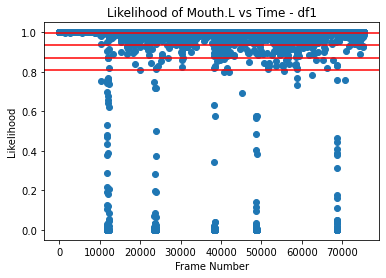

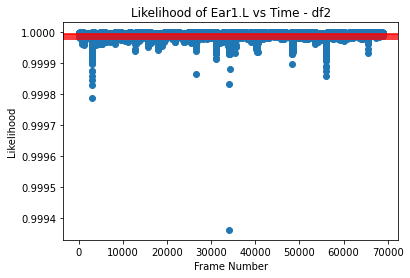

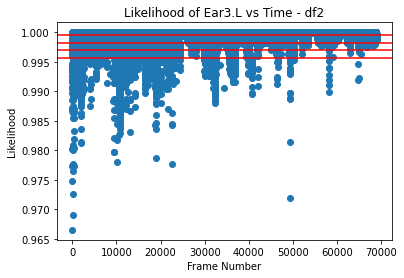

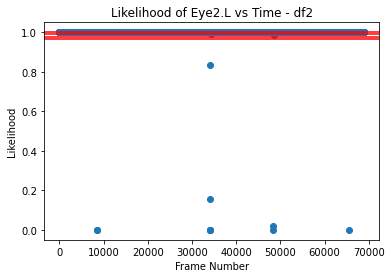

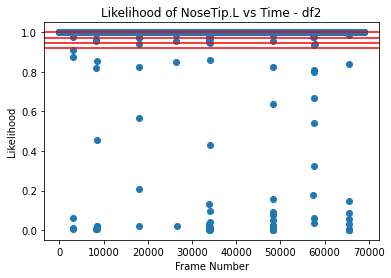

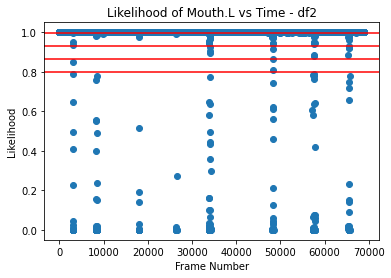

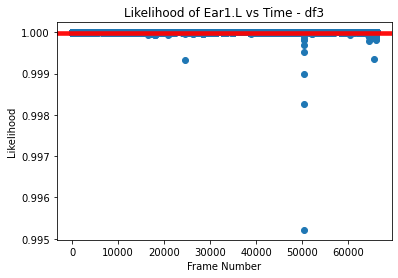

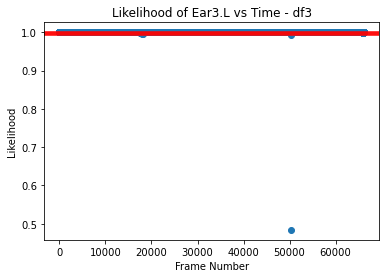

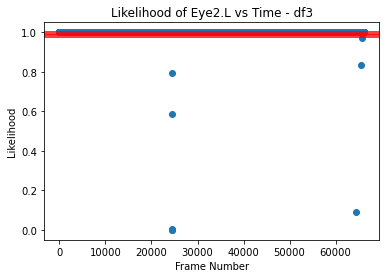

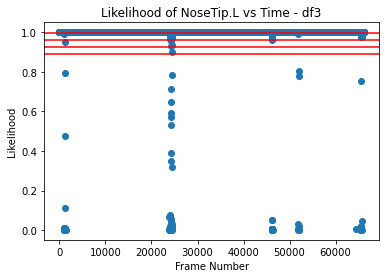

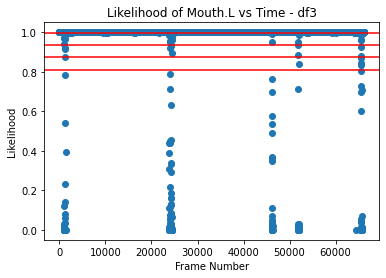

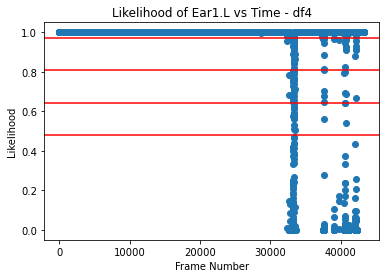

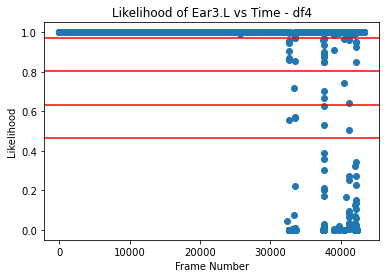

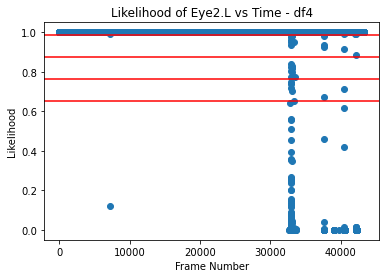

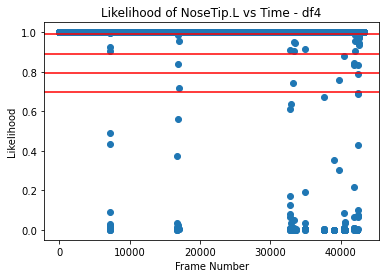

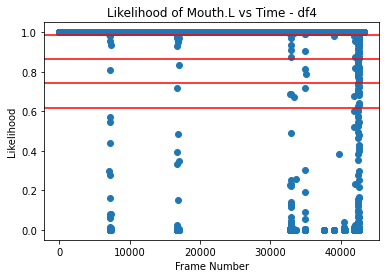

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting some likelihood distributions

# Looking for outliers:
# option 1: arbitrary fixed threshold
# option 2: more than 3 standard deviations from the mean

# went with option 1 with threshold 0.98 (based on trial and error & checking on Fiji) 

for col in ["Ear1.L","Ear3.L","Eye2.L", "NoseTip.L","Mouth.L"]:
    plt.scatter(x=df1['Frames'],y=df1[col])
    avg = np.mean(df1[col].tolist())
    std = np.std(df1[col].tolist())
    plt.axhline(avg, color = "red")
    plt.axhline(avg - std, color = "red")
    plt.axhline(avg - 2 * std, color = "red")
    plt.axhline(avg - 3 * std, color = "red")
    plt.title('Likelihood of ' + col + ' vs Time - df1')
    plt.xlabel("Frame Number")
    plt.ylabel("Likelihood")
    plt.show()
    # option 2 implemented, but not used anymore 
    
    #df = pd.DataFrame.copy(df1, deep = True)
    #copydf1 = pd.DataFrame.copy(df1, deep = True)
    #keeping = []
    #for frame in df1.index:
    #    if(df1.at[frame,col] < avg - 3 * std):
    #        keeping.append(frame)
    #df = df.drop(df.index[list(set(df.index).difference(keeping))], inplace = False)  
    #dff = df1.drop(df1.index[keeping])
    #print(dff[col].sort_values())
    #print(df[col].sort_values())
    

for col in ["Ear1.L","Ear3.L","Eye2.L", "NoseTip.L","Mouth.L"]:
    plt.scatter(x=df2['Frames'],y=df2[col])
    avg = np.mean(df2[col].tolist())
    std = np.std(df2[col].tolist())
    plt.axhline(avg, color = "red")
    plt.axhline(avg - std, color = "red")
    plt.axhline(avg - 2 * std, color = "red")
    plt.axhline(avg - 3 * std, color = "red")
    plt.title('Likelihood of ' + col + ' vs Time - df2')
    plt.xlabel("Frame Number")
    plt.ylabel("Likelihood")
    plt.show()
    #df = pd.DataFrame.copy(df2, deep = True)
    #keeping = []
    #for frame in df2.index:
    #    if(df2.at[frame,col] < avg - 3 * std):
    #        keeping.append(frame)
    #df = df.drop(df.index[list(set(df.index).difference(keeping))], inplace = False) 
    #dff = df2.drop(df2.index[keeping])
    #print(dff[col].sort_values())
    #print(df[col].sort_values())


for col in ["Ear1.L","Ear3.L","Eye2.L", "NoseTip.L","Mouth.L"]:
    plt.scatter(x=df3['Frames'],y=df3[col])
    avg = np.mean(df3[col].tolist())
    std = np.std(df3[col].tolist())
    plt.axhline(avg, color = "red")
    plt.axhline(avg - std, color = "red")
    plt.axhline(avg - 2 * std, color = "red")
    plt.axhline(avg - 3 * std, color = "red")
    plt.title('Likelihood of ' + col + ' vs Time - df3')
    plt.xlabel("Frame Number")
    plt.ylabel("Likelihood")
    plt.show()
    #df = pd.DataFrame.copy(df3, deep = True)
    #keeping = []
    #for frame in df3.index:
    #    if(df3.at[frame,col] < avg - 3 * std):
    #        keeping.append(frame)
    #df = df.drop(df.index[list(set(df.index).difference(keeping))], inplace = False)   
    #dff = df3.drop(df3.index[keeping])
    #print(dff[col].sort_values())
    #print(df[col].sort_values())


for col in ["Ear1.L","Ear3.L","Eye2.L", "NoseTip.L","Mouth.L"]:
    plt.scatter(x=df4['Frames'],y=df4[col])
    avg = np.mean(df4[col].tolist())
    std = np.std(df4[col].tolist())
    plt.axhline(avg, color = "red")
    plt.axhline(avg - std, color = "red")
    plt.axhline(avg - 2 * std, color = "red")
    plt.axhline(avg - 3 * std, color = "red")
    plt.title('Likelihood of ' + col + ' vs Time - df4')
    plt.xlabel("Frame Number")
    plt.ylabel("Likelihood")
    plt.show()
    #df = pd.DataFrame.copy(df4, deep = True)
    #keeping = []
    #for frame in df4.index:
    #    if(df4.at[frame,col] < avg - 3 * std):
    #        keeping.append(frame)
    #df = df.drop(df.index[list(set(df.index).difference(keeping))], inplace = False)    
    #dff = df4.drop(df4.index[keeping])
    #print(dff[col].sort_values())
    #print(df[col].sort_values())
    





From Likelihood Analysis, setting all frames with at least some bodypart with likelihood < 0.98 as NaN because occlusions happen or bad labeling

In [21]:
#animal 1
df1['outlier'] = pd.Series(0, index=df1.index)
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df1[df1[y]<0.92].index.tolist():
        for z in df1.columns:
            if((z in list_likelihood)==False): 
                df1.loc[x, z] = np.nan
        df1.at[x,'outlier'] = 1
print(df1[df1['outlier'] == 1])
# 30479 is an outlier
print(df1.iloc[27197:27215,:])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
4674      NaN     NaN     NaN  0.999996     NaN     NaN  0.999981     NaN   
4675      NaN     NaN     NaN  0.999998     NaN     NaN  0.999962     NaN   
4704      NaN     NaN     NaN  0.999996     NaN     NaN  0.999974     NaN   
4705      NaN     NaN     NaN  0.999996     NaN     NaN  0.999969     NaN   
5290      NaN     NaN     NaN  0.999994     NaN     NaN  0.999982     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
72063     NaN     NaN     NaN  0.999999     NaN     NaN  0.999970     NaN   
73103     NaN     NaN     NaN  0.999998     NaN     NaN  0.999962     NaN   
74119     NaN     NaN     NaN  0.999998     NaN     NaN  0.999984     NaN   
74491     NaN     NaN     NaN  0.999999     NaN     NaN  0.999992     NaN   
74572     NaN     NaN     NaN  0.999993     NaN     NaN  0.999982     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

In [22]:
# animal 2
df2['outlier'] = pd.Series(0, index=df2.index)
import numpy as np
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df2[df2[y]<0.98].index.tolist():
        for z in df2.columns:
            if((z in list_likelihood)==False): 
                df2.loc[x, z] = np.nan
        df2.at[x,'outlier'] = 1
print(df2[df2['outlier'] == 1])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
22        NaN     NaN     NaN  0.999996     NaN     NaN  0.996565     NaN   
26        NaN     NaN     NaN  0.999997     NaN     NaN  0.998258     NaN   
27        NaN     NaN     NaN  0.999995     NaN     NaN  0.997390     NaN   
28        NaN     NaN     NaN  0.999997     NaN     NaN  0.998447     NaN   
29        NaN     NaN     NaN  0.999997     NaN     NaN  0.998268     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
65582     NaN     NaN     NaN  0.999975     NaN     NaN  0.999989     NaN   
65590     NaN     NaN     NaN  0.999964     NaN     NaN  0.999983     NaN   
65684     NaN     NaN     NaN  0.999998     NaN     NaN  0.999967     NaN   
65685     NaN     NaN     NaN  0.999996     NaN     NaN  0.999986     NaN   
65732     NaN     NaN     NaN  0.999998     NaN     NaN  0.999911     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

In [23]:
# animal 3
df3['outlier'] = pd.Series(0, index=df3.index)
import numpy as np
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df3[df3[y]<0.98].index.tolist():
        for z in df3.columns:
            if((z in list_likelihood)==False): 
                df3.loc[x, z] = np.nan
        df3.at[x,'outlier'] = 1
print(df3[df3['outlier'] == 1])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
1050      NaN     NaN     NaN  0.999998     NaN     NaN  0.999980     NaN   
1051      NaN     NaN     NaN  0.999998     NaN     NaN  0.999979     NaN   
1055      NaN     NaN     NaN  0.999997     NaN     NaN  0.999979     NaN   
1056      NaN     NaN     NaN  0.999999     NaN     NaN  0.999980     NaN   
1059      NaN     NaN     NaN  0.999999     NaN     NaN  0.999966     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
65651     NaN     NaN     NaN  0.999999     NaN     NaN  0.999982     NaN   
65662     NaN     NaN     NaN  0.999998     NaN     NaN  0.999983     NaN   
65663     NaN     NaN     NaN  0.999998     NaN     NaN  0.999986     NaN   
65664     NaN     NaN     NaN  0.999994     NaN     NaN  0.999977     NaN   
65665     NaN     NaN     NaN  0.999989     NaN     NaN  0.999977     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

In [24]:
# animal 4
df4['outlier'] = pd.Series(0, index=df4.index)
import numpy as np
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df4[df4[y]<0.98].index.tolist():
        for z in df4.columns:
            if((z in list_likelihood)==False): 
                df4.loc[x, z] = np.nan
        df4.at[x,'outlier'] = 1
print(df4[df4['outlier'] == 1])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
7032      NaN     NaN     NaN  0.999998     NaN     NaN  0.999982     NaN   
7146      NaN     NaN     NaN  0.999996     NaN     NaN  0.999988     NaN   
7162      NaN     NaN     NaN  0.999998     NaN     NaN  0.999987     NaN   
7163      NaN     NaN     NaN  0.999998     NaN     NaN  0.999970     NaN   
7174      NaN     NaN     NaN  0.999999     NaN     NaN  0.999973     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
42610     NaN     NaN     NaN  1.000000     NaN     NaN  0.999980     NaN   
42611     NaN     NaN     NaN  1.000000     NaN     NaN  0.999980     NaN   
42612     NaN     NaN     NaN  1.000000     NaN     NaN  0.999980     NaN   
42613     NaN     NaN     NaN  1.000000     NaN     NaN  0.999977     NaN   
42614     NaN     NaN     NaN  0.999999     NaN     NaN  0.999978     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

In [25]:
# duration of stimuli in seconds
s_laser = 0.1
s_shock = 2
s_squeak = 2

#fps is no longer split in 3 for batch 2
fps = 15.49

# intervals that we look at for facial expressions: (0s,duration_stimulus + 3s)

list_end1 = pd.DataFrame(index=list_start1.index, columns=list_start1.columns)
list_end1['shock'] = list_start1['shock'] + (s_shock+3)*fps
list_end1['shockCTRL'] = list_start1['shockCTRL'] + (s_shock+3)*fps
list_end1['squeak'] = list_start1['squeak'] + (s_squeak+3)*fps
list_end1['squeakCTRL'] = list_start1['squeakCTRL'] + (s_squeak+3)*fps
list_end1['laserHI'] = list_start1['laserHI'] + (s_laser+3)*fps
list_end1['laserLO'] = list_start1['laserLO'] + (s_laser+3)*fps
list_end1['laserCTRL'] = list_start1['laserCTRL'] + (s_laser+3)*fps
list_end1 = list_end1.round()
#list_end1.to_csv("list_end21.csv")
#print(list_end1)

list_end2 = pd.DataFrame(index=list_start2.index, columns=list_start2.columns)
list_end2['shock'] = list_start2['shock'] + (s_shock+3)*fps
list_end2['shockCTRL'] = list_start2['shockCTRL'] + (s_shock+3)*fps
list_end2['squeak'] = list_start2['squeak'] + (s_squeak+3)*fps
list_end2['squeakCTRL'] = list_start2['squeakCTRL'] + (s_squeak+3)*fps
list_end2['laserHI'] = list_start2['laserHI'] + (s_laser+3)*fps
list_end2['laserLO'] = list_start2['laserLO'] + (s_laser+3)*fps
list_end2['laserCTRL'] = list_start2['laserCTRL'] + (s_laser+3)*fps
list_end2 = list_end2.round()
#list_end2.to_csv("list_end22.csv")
#print(list_end2)

list_end3 = pd.DataFrame(index=list_start3.index, columns=list_start3.columns)
list_end3['shock'] = list_start3['shock'] + (s_shock+3)*fps
list_end3['shockCTRL'] = list_start3['shockCTRL'] + (s_shock+3)*fps
list_end3['squeak'] = list_start3['squeak'] + (s_squeak+3)*fps
list_end3['squeakCTRL'] = list_start3['squeakCTRL'] + (s_squeak+3)*fps
list_end3['laserHI'] = list_start3['laserHI'] + (s_laser+3)*fps
list_end3['laserLO'] = list_start3['laserLO'] + (s_laser+3)*fps
list_end3['laserCTRL'] = list_start3['laserCTRL'] + (s_laser+3)*fps
list_end3 = list_end3.round()
#print(list_end3)

list_end4 = pd.DataFrame(index=list_start4.index, columns=list_start4.columns)
list_end4['shock'] = list_start4['shock'] + (s_shock+3)*fps
list_end4['shockCTRL'] = list_start4['shockCTRL'] + (s_shock+3)*fps
list_end4['squeak'] = list_start4['squeak'] + (s_squeak+3)*fps
list_end4['squeakCTRL'] = list_start4['squeakCTRL'] + (s_squeak+3)*fps
list_end4['laserHI'] = list_start4['laserHI'] + (s_laser+3)*fps
list_end4['laserLO'] = list_start4['laserLO'] + (s_laser+3)*fps
list_end4['laserCTRL'] = list_start4['laserCTRL'] + (s_laser+3)*fps
list_end4 = list_end4.round()
#list_end4.to_csv("list_end24.csv")
#print(list_end4)



Do these outlier frames from above happen during stimulus period???
Answer: 

In [26]:
# list of frames that are missing values during intervals of interest
# animal 1
list_1 = df1[df1['outlier'] == 1].index.tolist()
sum_1 = 0
for x in list_1:
    for col in list_start1.columns:
        for row in list_start1.index:
            if(list_start1.at[row,col]<=x & x<=list_end1.at[row,col]):
                print(x)
                sum_1 = sum_1+1
print("Number of outlier frames during all stimuli intervals for animal_1 is " + str(sum_1))

8310
8332
8333
8337
8339
10416
10419
10422
18314
18707
22095
22121
23518
23519
23521
23522
23525
23526
23532
23533
23538
23539
Number of outlier frames during all stimuli intervals for animal_1 is 22


In [27]:
# animal 2
list_2 = df2[df2['outlier'] == 1].index.tolist()
sum_2 = 0
for x in list_2:
    for col in list_start2.columns:
        for row in list_start2.index:
            if(list_start2.at[row,col]<=x & x<=list_end2.at[row,col]):
                print(x)
                sum_2 = sum_2+1
print("Number of outlier frames during all stimuli intervals for animal_2 is " + str(sum_2))

1926
1968
1971
10105
65457
65459
65466
65468
65469
65470
65471
65472
65473
65475
65476
65478
65480
65483
65486
65490
Number of outlier frames during all stimuli intervals for animal_2 is 20


In [28]:
# animal 3
list_3 = df3[df3['outlier'] == 1].index.tolist()
sum_3 = 0
for x in list_3:
    for col in list_start3.columns:
        for row in list_start3.index:
            if(list_start3.at[row,col]<=x & x<=list_end3.at[row,col]):
                print(x)
                sum_3 = sum_3+1
print("Number of outlier frames during all stimuli intervals for animal_3 is " + str(sum_3))
# mouth is slight outlier in these but not too bad

64944
64947
64950
64953
64956
64959
64962
64965
64968
64971
64974
64977
64980
64983
64986
64989
Number of outlier frames during all stimuli intervals for animal_3 is 16


In [29]:
# animal 4
list_4 = df4[df4['outlier'] == 1].index.tolist()
sum_4 = 0
for x in list_4:
    for col in list_start4.columns:
        for row in list_start4.index:
            if(list_start4.at[row,col]<=x & x<=list_end4.at[row,col]):
                print(x)
                sum_4 = sum_4+1
print("Number of outlier frames during all stimuli interval for animal_4 is " + str(sum_4))

Number of outlier frames during all stimuli interval for animal_4 is 0


Extracting Outlier Frames with Method 'Jump' (A bodypart jumping more than a threshold between two frames)

In [30]:
# creating "distance" dataframe with values of pixel movement of each bodypart across two consecutive frames for whole video
# ".X" in distance dataframe actually contains movement across both dimensions X and Y of that bodypart
import math
#animal 1
distances1 = pd.DataFrame(index=df1.index,columns=df1.columns)
for row in distances1.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=0):
            distances1.iat[row,col] = math.sqrt(pow(df1.iat[row,col] - df1.iat[row-1,col],2) \
            + pow(df1.iat[row,col+1] - df1.iat[row-1,col+1],2))
distances1 = distances1.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances1 = distances1.drop(columns=['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y'])
distances1.drop(distances1.tail(1).index,inplace=True)
print(distances1.head())
print(distances1.iloc[27197:27215,:])

#animal 2
distances2 = pd.DataFrame(index=df2.index,columns=df2.columns)
for row in distances2.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=0):
            distances2.iat[row,col] = math.sqrt(pow(df2.iat[row,col] - df2.iat[row-1,col],2) \
            + pow(df2.iat[row,col+1] - df2.iat[row-1,col+1],2))
distances2 = distances2.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances2 = distances2.drop(columns=['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y'])
distances2.drop(distances2.tail(1).index,inplace=True)
print(distances2.head())

#animal 3
distances3 = pd.DataFrame(index=df3.index,columns=df3.columns)
for row in distances3.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=0):
            distances3.iat[row,col] = math.sqrt(pow(df3.iat[row,col] - df3.iat[row-1,col],2) \
            + pow(df3.iat[row,col+1] - df3.iat[row-1,col+1],2))
distances3 = distances3.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances3 = distances3.drop(columns=['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y'])
distances3.drop(distances3.tail(1).index,inplace=True)
print(distances3.head())

#animal 4
distances4 = pd.DataFrame(index=df4.index,columns=df4.columns)
for row in distances4.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=0):
            distances4.iat[row,col] = math.sqrt(pow(df4.iat[row,col] - df4.iat[row-1,col],2) \
            + pow(df4.iat[row,col+1] - df4.iat[row-1,col+1],2))
distances4 = distances4.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances4 = distances4.drop(columns=['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y'])
distances4.drop(distances4.tail(1).index,inplace=True)
print(distances4.head())

     Ear1.X    Ear2.X    Ear3.X   Ear4.X    Ear5.X    Eye1.X    Eye2.X  \
0       NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1   1.73162   1.71586   1.27575  1.67806   1.41769  0.844909   0.15307   
2   2.86345   3.54032   2.99238  3.17756   2.21192  0.612215  0.376493   
3   1.75272   1.78044   2.29049  1.85635    1.7762  0.394434  0.288291   
4  0.284792  0.608794  0.824533  0.46829  0.178321  0.570652  0.136095   

      Eye3.X    Eye4.X SnoutMid.X NoseTip.X   Mouth.X  
0        NaN       NaN        NaN       NaN       NaN  
1  0.0510052  0.438466    1.18489   1.02091  0.586403  
2   0.213171  0.244513    3.95891   2.94507   1.46903  
3   0.383575  0.197881    1.15546   1.20644   1.16188  
4  0.0255935  0.223787   0.981435   1.76928  0.492175  
         Ear1.X    Ear2.X    Ear3.X    Ear4.X    Ear5.X    Eye1.X     Eye2.X  \
27197  0.378872   1.19712  0.625509  0.938439  0.575187  0.502019   0.336107   
27198  0.087954  0.604395  0.843699  0.342175  0.128193  0.

In [31]:
# tried more values for threshold of identifying outliers, and 20 seemed a good compromise 
# higher threshold here than in batch 1 bcs videos have better resolution

jump1 = pd.DataFrame(columns = distances1.columns)
for col in distances1.columns:
    list_outlier = []
    for row in distances1.index:            
        if(distances1.at[row,col] > 32):
            list_outlier.append(row)
    jump1[col] = pd.Series(list_outlier)
    # this is a false positive for outliers
    if(30481 in list_outlier):
        list_outlier.remove(30481)
    df1.loc[list_outlier,:] = np.nan
print(jump1.head())
print(jump1.shape)
print(jump1.loc[:,"Ear3.X"])

jump2 = pd.DataFrame(columns = distances2.columns)
for col in distances2.columns:
    list_outlier = []
    for row in distances2.index:            
        if(distances2.at[row,col] > 30):
            list_outlier.append(row)
    jump2[col] = pd.Series(list_outlier)
    df2.loc[list_outlier,:] = np.nan
print(jump2.head())
print(jump2.shape)

jump3 = pd.DataFrame(columns = distances3.columns)
for col in distances3.columns:
    list_outlier = []
    for row in distances3.index:            
        if(distances3.at[row,col] > 30):
            list_outlier.append(row)
    jump3[col] = pd.Series(list_outlier)
    df3.loc[list_outlier,:] = np.nan
print(jump3.head())
print(jump3.shape)

jump4 = pd.DataFrame(columns = distances4.columns)
for col in distances4.columns:
    list_outlier = []
    for row in distances4.index:            
        if(distances4.at[row,col] > 30):
            list_outlier.append(row)
    jump4[col] = pd.Series(list_outlier)
    df4.loc[list_outlier,:] = np.nan
print(jump4.head())
print(jump4.shape)

<ipython-input-31-b43db7c688b6>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump1[col] = pd.Series(list_outlier)


   Ear1.X   Ear2.X  Ear3.X  Ear4.X  Ear5.X  Eye1.X  Eye2.X  Eye3.X  Eye4.X  \
0   38401  34020.0   30479    5491    5302     NaN     NaN     NaN     NaN   
1   38480  65704.0   30481    5498    5491     NaN     NaN     NaN     NaN   
2   48744      NaN   30505    5670    5492     NaN     NaN     NaN     NaN   
3   48834      NaN   30511    5673    5498     NaN     NaN     NaN     NaN   
4   66454      NaN   30521    5681    5671     NaN     NaN     NaN     NaN   

   SnoutMid.X  NoseTip.X  Mouth.X  
0         NaN        NaN      NaN  
1         NaN        NaN      NaN  
2         NaN        NaN      NaN  
3         NaN        NaN      NaN  
4         NaN        NaN      NaN  
(5, 12)
0    30479
1    30481
2    30505
3    30511
4    30521
Name: Ear3.X, dtype: int64


<ipython-input-31-b43db7c688b6>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump2[col] = pd.Series(list_outlier)


   Ear1.X  Ear2.X  Ear3.X  Ear4.X  Ear5.X  Eye1.X  Eye2.X  Eye3.X  Eye4.X  \
0   34084     NaN     234     NaN     NaN     NaN     NaN     NaN     NaN   

   SnoutMid.X  NoseTip.X  Mouth.X  
0         NaN        NaN      NaN  
(1, 12)


<ipython-input-31-b43db7c688b6>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump3[col] = pd.Series(list_outlier)


   Ear1.X  Ear2.X   Ear3.X   Ear4.X  Ear5.X  Eye1.X  Eye2.X  Eye3.X  Eye4.X  \
0     NaN   50307  50307.0  50307.0     NaN     NaN     NaN     NaN     NaN   
1     NaN   50333      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN   50334      NaN      NaN     NaN     NaN     NaN     NaN     NaN   

   SnoutMid.X  NoseTip.X  Mouth.X  
0         NaN        NaN      NaN  
1         NaN        NaN      NaN  
2         NaN        NaN      NaN  
(3, 12)


<ipython-input-31-b43db7c688b6>:47: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump4[col] = pd.Series(list_outlier)


   Ear1.X  Ear2.X  Ear3.X  Ear4.X   Ear5.X  Eye1.X  Eye2.X  Eye3.X  Eye4.X  \
0     NaN    2381    2381     NaN  40883.0     NaN     NaN     NaN     NaN   
1     NaN    3077    3077     NaN      NaN     NaN     NaN     NaN     NaN   
2     NaN    3638    3625     NaN      NaN     NaN     NaN     NaN     NaN   
3     NaN    4293    3638     NaN      NaN     NaN     NaN     NaN     NaN   
4     NaN    5117    4293     NaN      NaN     NaN     NaN     NaN     NaN   

   SnoutMid.X  NoseTip.X  Mouth.X  
0         NaN        NaN      NaN  
1         NaN        NaN      NaN  
2         NaN        NaN      NaN  
3         NaN        NaN      NaN  
4         NaN        NaN      NaN  
(11, 12)


In [32]:
# saving csv files without probabilities and with missing values included for low prob/outliers

#30480 is also an outlier but not identified befeore
df1.iloc[30479,:] = np.nan
df1.iloc[30480,:] = np.nan
df1.iloc[30505:30510,:] = np.nan
df1.iloc[30521,:] = np.nan
df1.iloc[30523:30541,:] = np.nan

df1=df1.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
df2=df2.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
df3=df3.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
df4=df4.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])



In [33]:
#Averaging every 3 consecutive frames to get to fps 15.49/3 like in batch 1
import math
df1_new = pd.DataFrame(index = range(0,math.floor(len(df1.index.tolist())/3)), columns = df1.columns)
for ind in df1_new.index:
    df1_new.loc[ind,:] = pd.Series(df1.iloc[[3*ind,3*ind+1,3*ind+2], :].mean(axis=0))
df1_new.loc[10170,:] = np.nan
    
df2_new = pd.DataFrame(index = range(0,math.floor(len(df2.index.tolist())/3)), columns = df2.columns)
for ind in df2_new.index:
    df2_new.loc[ind,:] = pd.Series(df2.iloc[[3*ind,3*ind+1,3*ind+2], :].mean(axis=0))

df3_new = pd.DataFrame(index = range(0,math.floor(len(df3.index.tolist())/3)), columns = df3.columns)
for ind in df3_new.index:
    df3_new.loc[ind,:] = pd.Series(df3.iloc[[3*ind,3*ind+1,3*ind+2], :].mean(axis=0))
    
df4_new = pd.DataFrame(index = range(0,math.floor(len(df4.index.tolist())/3)), columns = df4.columns)
for ind in df4_new.index:
    df4_new.loc[ind,:] = pd.Series(df4.iloc[[3*ind,3*ind+1,3*ind+2], :].mean(axis=0))


#df1_new.to_csv(r'OutputAnimal21.csv')
#df2_new.to_csv(r'OutputAnimal22.csv')
#df3_new.to_csv(r'OutputAnimal23.csv')
#df4_new.to_csv(r'OutputAnimal24.csv')

In [3]:
# stim times for facial expression video, but we need to make them back to fps = 15.49/3
import pandas as pd
import numpy as np
list_start1 = pd.read_csv("stim_times_442681.csv")
list_start1 = list_start1/3
list_start1 = list_start1.apply(np.floor)
list_start1 = list_start1 - 1
list_start1 = list_start1.astype(int)
list_start1.to_csv("list_start21.csv") # same as stim_times list, just staying consisent with the name
print(list_start1)

list_start2 = pd.read_csv("stim_times_442682.csv")
list_start2 = list_start2/3
list_start2 = list_start2.apply(np.floor)
list_start2 = list_start2 - 1
list_start2 = list_start2.astype(int)
list_start2.to_csv("list_start22.csv")
print(list_start2)

list_start3 = pd.read_csv("stim_times_442683.csv")
list_start3 = list_start3/3
list_start3 = list_start3.apply(np.floor)
list_start3 = list_start3 - 1
list_start3 = list_start3.astype(int)
list_start3.to_csv("list_start23.csv")
print(list_start3)

#missing laser trials for animal 4
list_start4 = pd.read_csv("stim_times_442684.csv")
list_start4 = list_start4.dropna(axis = 1)
list_start4 = list_start4/3
list_start4 = list_start4.apply(np.floor)
list_start4 = list_start4 - 1
list_start4 = list_start4.astype(int)
list_start4.to_csv("list_start24.csv")
print(list_start4)

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    15058    15346      14724   7030       6760     606         881
1    16411    15995      15656   7278       7465    1047        1270
2    17396    17090      16732   7972       7770    1498        1757
3    17611    18285      17972   8573       8262    1923        2120
4    18662    19203      18968   9064       8790    2399        2699
5    19769    20401      19535   9370       9577    3181        2984
6    21764    21226      20795  10157       9867    3486        3719
7    22085    22995      22467  10400      10576    3989        4237
8    23958    23261      23515  10840      11120    4408        4590
9    24757    24511      24259  11338      11612    4885        5107
   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    13021    12775      12485    921        631    7110        7348
1    13632    13908      13368   1392       1164    7550        7726
2    14244    14953      14617   1

In [4]:
# duration of stimuli in seconds
s_laser = 0.1
s_shock = 2
s_squeak = 2

#fps is no longer split in 3 for batch 2
fps = 15.49/3

# intervals that we look at for facial expressions: (0s,duration_stimulus + 3s)

list_end1 = pd.DataFrame(index=list_start1.index, columns=list_start1.columns)
list_end1['shock'] = list_start1['shock'] + (s_shock+3)*fps
list_end1['shockCTRL'] = list_start1['shockCTRL'] + (s_shock+3)*fps
list_end1['squeak'] = list_start1['squeak'] + (s_squeak+3)*fps
list_end1['squeakCTRL'] = list_start1['squeakCTRL'] + (s_squeak+3)*fps
list_end1['laserHI'] = list_start1['laserHI'] + (s_laser+3)*fps
list_end1['laserLO'] = list_start1['laserLO'] + (s_laser+3)*fps
list_end1['laserCTRL'] = list_start1['laserCTRL'] + (s_laser+3)*fps
list_end1 = list_end1.round().astype(int)
list_end1.to_csv("list_end21.csv")
print(list_end1)

list_end2 = pd.DataFrame(index=list_start2.index, columns=list_start2.columns)
list_end2['shock'] = list_start2['shock'] + (s_shock+3)*fps
list_end2['shockCTRL'] = list_start2['shockCTRL'] + (s_shock+3)*fps
list_end2['squeak'] = list_start2['squeak'] + (s_squeak+3)*fps
list_end2['squeakCTRL'] = list_start2['squeakCTRL'] + (s_squeak+3)*fps
list_end2['laserHI'] = list_start2['laserHI'] + (s_laser+3)*fps
list_end2['laserLO'] = list_start2['laserLO'] + (s_laser+3)*fps
list_end2['laserCTRL'] = list_start2['laserCTRL'] + (s_laser+3)*fps
list_end2 = list_end2.round().astype(int)
list_end2.to_csv("list_end22.csv")
print(list_end2)

list_end3 = pd.DataFrame(index=list_start3.index, columns=list_start3.columns)
list_end3['shock'] = list_start3['shock'] + (s_shock+3)*fps
list_end3['shockCTRL'] = list_start3['shockCTRL'] + (s_shock+3)*fps
list_end3['squeak'] = list_start3['squeak'] + (s_squeak+3)*fps
list_end3['squeakCTRL'] = list_start3['squeakCTRL'] + (s_squeak+3)*fps
list_end3['laserHI'] = list_start3['laserHI'] + (s_laser+3)*fps
list_end3['laserLO'] = list_start3['laserLO'] + (s_laser+3)*fps
list_end3['laserCTRL'] = list_start3['laserCTRL'] + (s_laser+3)*fps
list_end3 = list_end3.round().astype(int)
list_end3.to_csv("list_end23.csv")
print(list_end3)

list_end4 = pd.DataFrame(index=list_start4.index, columns=list_start4.columns)
list_end4['shock'] = list_start4['shock'] + (s_shock+3)*fps
list_end4['shockCTRL'] = list_start4['shockCTRL'] + (s_shock+3)*fps
list_end4['squeak'] = list_start4['squeak'] + (s_squeak+3)*fps
list_end4['squeakCTRL'] = list_start4['squeakCTRL'] + (s_squeak+3)*fps
list_end4 = list_end4.round().astype(int)
list_end4.to_csv("list_end24.csv")
print(list_end4)



   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    15074    15362      14740   7056       6786     632         907
1    16427    16011      15672   7304       7491    1073        1296
2    17412    17106      16748   7998       7796    1524        1783
3    17627    18301      17988   8599       8288    1949        2146
4    18678    19219      18984   9090       8816    2425        2725
5    19785    20417      19551   9396       9603    3207        3010
6    21780    21242      20811  10183       9893    3512        3745
7    22101    23011      22483  10426      10602    4015        4263
8    23974    23277      23531  10866      11146    4434        4616
9    24773    24527      24275  11364      11638    4911        5133
   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0    13037    12791      12501    947        657    7136        7374
1    13648    13924      13384   1418       1190    7576        7752
2    14260    14969      14633   1

In [2]:
# face plotting function
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def plot(d,n,c):
    plt.scatter(x=d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X', 'Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X', 'SnoutMid.X', 'NoseTip.X', 'Mouth.X']], y=-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y']], color=c)
    plt.plot(d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X','Ear1.X']],-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y','Ear1.Y']], color=c)
    plt.plot(d.loc[n, ['Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X','Eye1.X']],-d.loc[n, ['Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y','Eye1.Y']], color=c)
    plt.plot(d.loc[n, ['SnoutMid.X', 'NoseTip.X', 'Mouth.X','SnoutMid.X']],-d.loc[n, ['SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y','SnoutMid.Y']], color=c)
    plt.ylim(-d.at[0,"Ear1.Y"] - 110 ,-d.at[0,"Ear3.Y"] + 50)
plt.show()

 Analysis for Animal 1:

# trying to find trial-specific baseline expression as average of before stimulus period doesnt work (baseline changes with time) => search for a fixed baseline instead
list=[]
for x in list_end1.columns:
    for y in list_end1.index:
        list.append(x+"_"+str(y))
df_mean_before1 = pd.DataFrame(columns=df1.columns, index=list)
for x in df1.columns:
    for y in list_start1.columns:
        for z in list_start1.index:
            df_mean_before1.at[str(y)+"_"+str(z),x] = df1.loc[list_before1.at[z,y]:list_start1.at[z,y],x].mean()
print(df_mean_before1)

for y in list_start1.columns:
        for z in list_start1.index:
            plt.title('Baseline expressions - for each period before stimulus (animal 1)')
            plot(df_mean_before1, str(y)+"_"+str(z), 'gray')

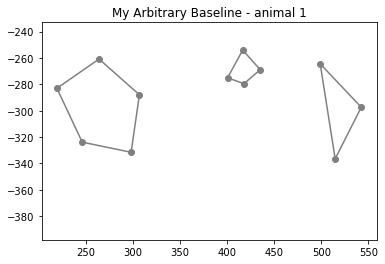

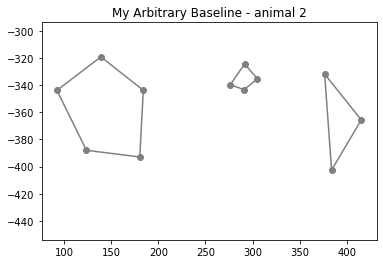

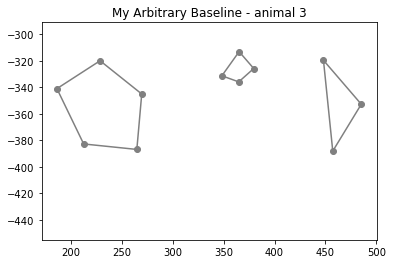

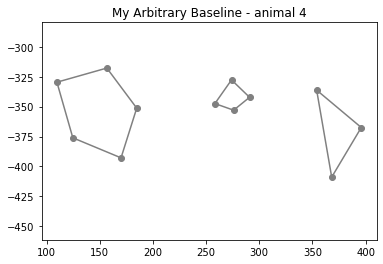

       Ear1.X      Ear1.Y      Ear2.X      Ear2.Y      Ear3.X      Ear3.Y  \
0  306.677746  287.924018  263.758999  260.801206  218.971182  282.969874   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  245.861924  323.837184  297.824218  331.537427  ...  400.404404   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  274.993533  417.763405  279.502588   498.85665  264.454617  542.522847   

    NoseTip.Y     Mouth.X   Mouth.Y  
0  297.364081  514.763749  336.4851  

[1 rows x 24 columns]
       Ear1.X      Ear1.Y      Ear2.X     Ear2.Y     Ear3.X     Ear3.Y  \
0  184.061794  343.834111  139.061879  319.26414  92.401783  343.88808   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  123.765389  388.002578  180.302602  392.898501  ...  276.431856   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  339.763496  290.978029  343.407628  376.479817  331.899899  415.364059   

    N

In [4]:
# Looked at the video and picked a 4 sec interval before any stimulus every happened that seemed at rest for each animal
# baseline is averaged facial expression in that interval
import matplotlib.pyplot as plt
df1_new=pd.read_csv('OutputAnimal21.csv',index_col = 0)
df2_new = pd.read_csv('OutputAnimal22.csv', index_col = 0)
df3_new = pd.read_csv('OutputAnimal23.csv', index_col = 0)
df4_new = pd.read_csv('OutputAnimal24.csv', index_col = 0)

my_baseline1 = pd.DataFrame(df1_new.loc[400:500,:].mean())
my_baseline1 = my_baseline1.T
plt.title('My Arbitrary Baseline - animal 1')
plot(my_baseline1, 0, 'gray')
my_baseline1.to_csv("BaselineExpression21.csv")
plt.show()

my_baseline2 = pd.DataFrame(df2_new.loc[400:500,:].mean()) #550:590
my_baseline2 = my_baseline2.T
plt.title('My Arbitrary Baseline - animal 2')
plot(my_baseline2, 0, 'gray')
my_baseline2.to_csv("BaselineExpression22.csv")
plt.show()

my_baseline3 = pd.DataFrame(df3_new.loc[400:500,:].mean())
my_baseline3 = my_baseline3.T
plt.title('My Arbitrary Baseline - animal 3')
my_baseline3.to_csv("BaselineExpression23.csv")
plot(my_baseline3, 0, 'gray')
plt.show()

my_baseline4 = pd.DataFrame(df4_new.loc[400:500,:].mean())
my_baseline4 = my_baseline4.T
plt.title('My Arbitrary Baseline - animal 4')
my_baseline4.to_csv("BaselineExpression24.csv")
plot(my_baseline4, 0, 'gray')
plt.show()

print(my_baseline1)
print(my_baseline2)
print(my_baseline3)
print(my_baseline4)


In [ ]:
# Euclidian Distance for Maximal Expressions
# Euclidian distance - not good bcs some points with more variance outweigh other points

def euclidian_max(animall):
    if(animall == "21"):
        list_start = list_start1
        list_end = list_end1
        df = pd.DataFrame.copy(df1, deep = True)
        my_baseline = pd.DataFrame.copy(my_baseline1, deep = True)
    elif(animall == "22"):
        list_start = list_start2
        list_end = list_end2
        df = pd.DataFrame.copy(df2, deep = True)
        my_baseline = pd.DataFrame.copy(my_baseline2, deep = True)
    elif(animall == "23"):
        list_start = list_start3
        list_end = list_end3
        df = pd.DataFrame.copy(df3, deep = True)
        my_baseline = pd.DataFrame.copy(my_baseline3, deep = True)
    elif(animall == "24"):
        list_start = list_start4
        list_end = list_end4
        df = pd.DataFrame.copy(df4, deep = True)
        my_baseline = pd.DataFrame.copy(my_baseline4, deep = True)
        
    for y in list_start.columns:
            for z in list_start.index:
                maxx = 0
                flag = 0
                for frame in range(int(list_start.at[z,y]),int(list_end.at[z,y]+1)):
                    summ = 0
                    for x in df.columns:
                        summ = summ + pow(my_baseline.at[0,x] - df.at[frame,x],2)
                    summ = math.sqrt(summ)
                    if(summ > maxx):
                        maxx = summ
                        flag = frame
                print("For Stimulus " + str(y)+"_"+str(z) + "the frame with maximum expression is " + str(flag))
                plot(my_baseline, 0, 'gray')
                plot(df, flag, colors.get(y))
                plt.show()
            
euclidian_max("21")